In [1]:
import numpy as np
import pandas as pd 
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import OrderedDict
cmap = mpl.colormaps['tab10']


In [2]:
atributo = "Curso"
total_embeddings = pd.read_csv("total_embeddings_with_bf_"+str(atributo)+"_p1q4_ftest.csv")
total_embeddings.drop("Unnamed: 0",axis=1,inplace=True)
total_embeddings["Escuela"] = total_embeddings["Escuela"].astype(int)
lista_nombres = ["t1","t2","t6","t11_1","t11_2","t11_3","t11_4","t11_5","t11_6","t11_7","t11_8",
                "t11_9","t11_10"]

In [3]:
for school in total_embeddings["Escuela"].unique():
    print(f"School : {school}")
    dataset = total_embeddings[total_embeddings["Escuela"] == school]
    print(len(dataset))

School : 0
8557
School : 1
3755
School : 2
12812
School : 3
5535
School : 4
11960
School : 5
4176
School : 6
1793
School : 7
4498
School : 8
2403
School : 9
1426
School : 10
3267
School : 11
6379
School : 12
7613


In [4]:
def colors_classification(list_values,atributo):
    dict_colors = OrderedDict()
    for item in list_values: 
        if item == "Missing":
            continue
            #dict_colors[item] = 0
        if item == "Intergroup":
            dict_colors[item] = cmap.colors[0]
        else: 
            dict_colors[item] = cmap.colors[int(item)]
    return dict_colors

In [5]:
dict_color = colors_classification(list(dataset["class_classif"].unique()),atributo)

# PCA

In [6]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.lines import Line2D
from matplotlib.font_manager import FontProperties

In [7]:
font = FontProperties("serif",
                      #style="italic",
                      size=20)

# Check for schools

School : 0
School : 1
School : 2
School : 3
School : 4
School : 5
School : 6
School : 7
School : 8
School : 9
School : 10
School : 11
School : 12


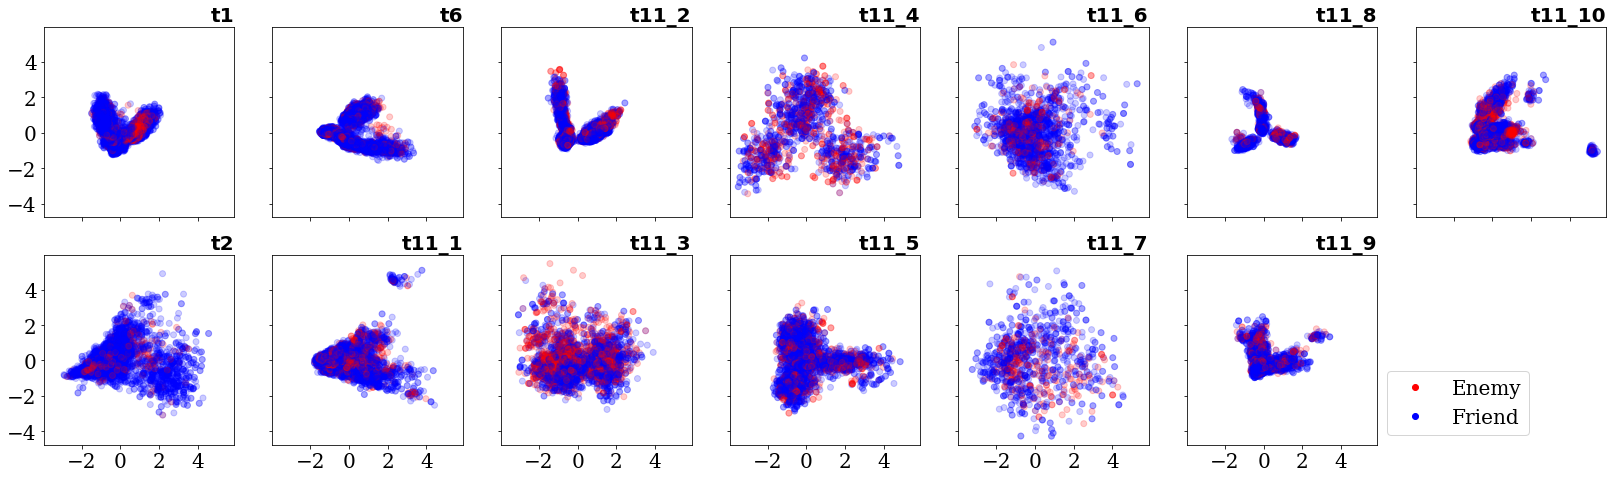

In [8]:
fig,ax = plt.subplots(nrows=2,ncols=7,figsize=(28,8),
                     sharex=True,sharey=True)
#fig.suptitle("PCA for each high school",family=font.get_family(),size=font.get_size()*1.5)
for school in total_embeddings["Escuela"].unique():
    print(f"School : {school}")
    dataset = total_embeddings[total_embeddings["Escuela"] == school]
    dataset = dataset[dataset["class_classif"] != "Missing"]
    #Versión en 2D
    pca = PCA(n_components=2,random_state = 0)
    emb_2d = pca.fit_transform(dataset.iloc[:,:total_embeddings.shape[1]-3].values)

    
    colors = {0:'red', 1:'blue'}
    ax[school%2,school//2].scatter(emb_2d[:,0],emb_2d[:,1],c=dataset["weight"].map(colors),alpha=0.2)
    ax[school%2,school//2].set_title(lista_nombres[school],fontweight="bold",loc ="right",fontsize=font.get_size())
    for tick in ax[school%2,school//2].get_xticklabels():
        tick.set_fontproperties(font)
    for tick in ax[school%2,school//2].get_yticklabels():
        tick.set_fontproperties(font)

    custom = [Line2D([], [], marker='.', color='red', linestyle='None'),
              Line2D([], [], marker='.', color='blue', linestyle='None')]
    if school == (total_embeddings["Escuela"].max()-1):
        ax[school%2,school//2].legend(handles = custom, labels=['Enemy', 'Friend'],
                                     markerscale=2.,
                                     prop=font,
                                    #fontsize=font.get_size(), title_fontsize=font.get_size(),
                                    bbox_to_anchor= (1,0), loc= "lower left")
 
fig.delaxes(ax[-1,-1])
plt.subplots_adjust(top=.85)
fig.savefig("PCA_2D_school_joined_womissing.jpg",bbox_inches="tight")

School : 0
School : 1
School : 2
School : 3
School : 4
School : 5
School : 6
School : 7
School : 8
School : 9
School : 10
School : 11
School : 12


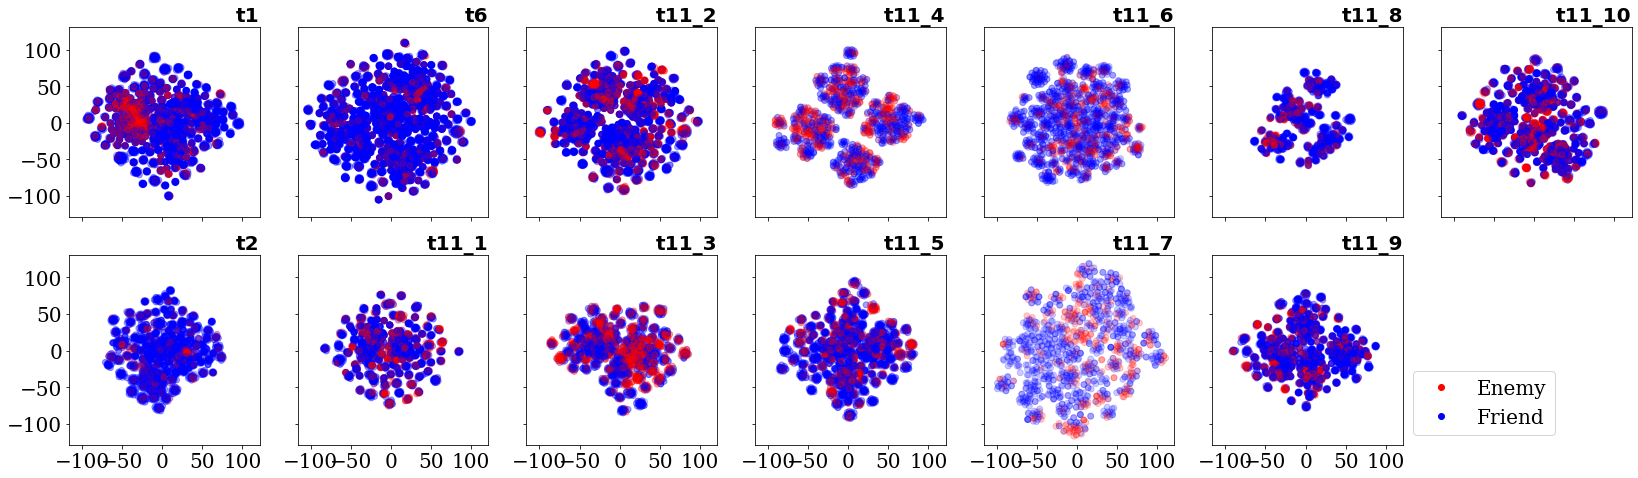

In [9]:
fig,ax = plt.subplots(nrows=2,ncols=7,figsize=(28,8),
                     sharex=True,sharey=True)
#fig.suptitle("TSNE for each high school",family=font.get_family(),size=font.get_size()*1.5)
for school in total_embeddings["Escuela"].unique():
    print(f"School : {school}")
    dataset = total_embeddings[total_embeddings["Escuela"] == school]
    dataset = dataset[dataset["class_classif"] != "Missing"]
    #Versión en 2D
    emb_2d = TSNE(n_components=2, learning_rate='auto',
                  init='random',random_state = 0).fit_transform(dataset.iloc[:,:total_embeddings.shape[1]-3].values)

    
    colors = {0:'red', 1:'blue'}
    ax[school%2,school//2].scatter(emb_2d[:,0],emb_2d[:,1],c=dataset["weight"].map(colors),alpha=0.2)
    ax[school%2,school//2].set_title(lista_nombres[school],fontweight="bold",loc ="right",fontsize=font.get_size())
    for tick in ax[school%2,school//2].get_xticklabels():
        tick.set_fontproperties(font)
    for tick in ax[school%2,school//2].get_yticklabels():
        tick.set_fontproperties(font)

    custom = [Line2D([], [], marker='.', color='red', linestyle='None'),
              Line2D([], [], marker='.', color='blue', linestyle='None')]
    if school == (total_embeddings["Escuela"].max()-1):
        ax[school%2,school//2].legend(handles = custom, labels=['Enemy', 'Friend'],
                                     markerscale=2.,
                                     prop=font,
                                    #fontsize=font.get_size(), title_fontsize=font.get_size(),
                                    bbox_to_anchor= (1,0), loc= "lower left")
 
fig.delaxes(ax[-1,-1])
plt.subplots_adjust(top=.85)
fig.savefig("TSNE_2D_school_joined_womissing.jpg",bbox_inches="tight")


School : 0
School : 1
School : 2
School : 3
School : 4
School : 5
School : 6
School : 7
School : 8
School : 9
School : 10
School : 11
School : 12


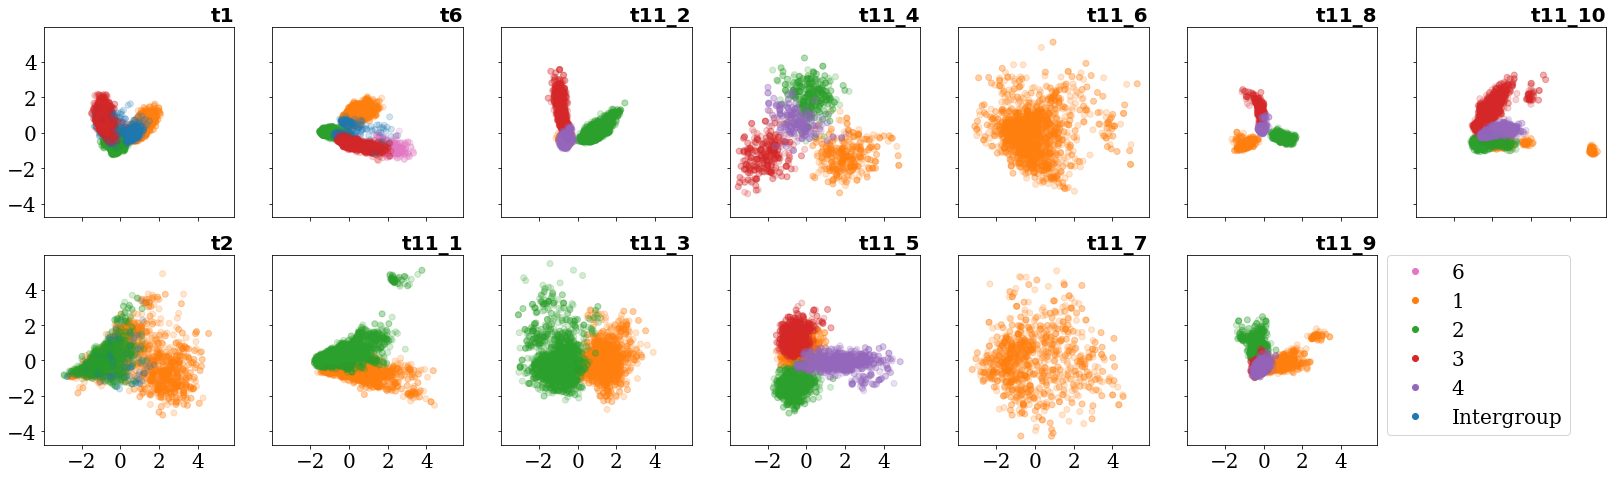

In [10]:
dict_color_leg = OrderedDict()
fig,ax = plt.subplots(nrows=2,ncols=7,figsize=(28,8),
                     sharex=True,sharey=True)
#fig.suptitle("PCA for each high school organized by course",family=font.get_family(),size=font.get_size()*1.5)
for school in total_embeddings["Escuela"].unique():
    print(f"School : {school}")
    dataset = total_embeddings[total_embeddings["Escuela"] == school]
    dataset = dataset[dataset["class_classif"] != "Missing"]
    #Versión en 2D
    pca = PCA(n_components=2,random_state = 0)
    emb_2d = pca.fit_transform(dataset.iloc[:,:total_embeddings.shape[1]-3].values)

    dict_color = colors_classification(list(dataset["class_classif"].unique()),atributo)
    dict_color_leg.update(dict_color)
    colors = dataset["class_classif"].map(dict_color)
    ax[school%2,school//2].scatter(emb_2d[:,0],emb_2d[:,1],c=colors,cmap=cmap,alpha=0.2)
    ax[school%2,school//2].set_title(lista_nombres[school],fontweight="bold",loc ="right",fontsize=font.get_size())
    for tick in ax[school%2,school//2].get_xticklabels():
        tick.set_fontproperties(font)
    for tick in ax[school%2,school//2].get_yticklabels():
        tick.set_fontproperties(font)


    if school == (total_embeddings["Escuela"].max()-1):
        dict_color_leg.move_to_end("Intergroup",)
        dict_color_leg.move_to_end("6",last=False)
        custom = [Line2D([], [], marker='.', color=i, linestyle='None')
          for i in dict_color_leg.values()]
        ax[school%2,school//2].legend(handles = custom, labels=dict_color_leg,
                                     markerscale=2.,
                                     prop=font,
                                   #fontsize=font.get_size(), title_fontsize=font.get_size(),
                                    bbox_to_anchor= (1,0), loc= "lower left")
fig.delaxes(ax[-1,-1])
plt.subplots_adjust(top=.85)
fig.savefig("PCA_2D_school_joined_womissing_"+str(atributo)+".jpg",bbox_inches="tight")






School : 0
School : 1
School : 2
School : 3
School : 4
School : 5
School : 6
School : 7
School : 8
School : 9
School : 10
School : 11
School : 12


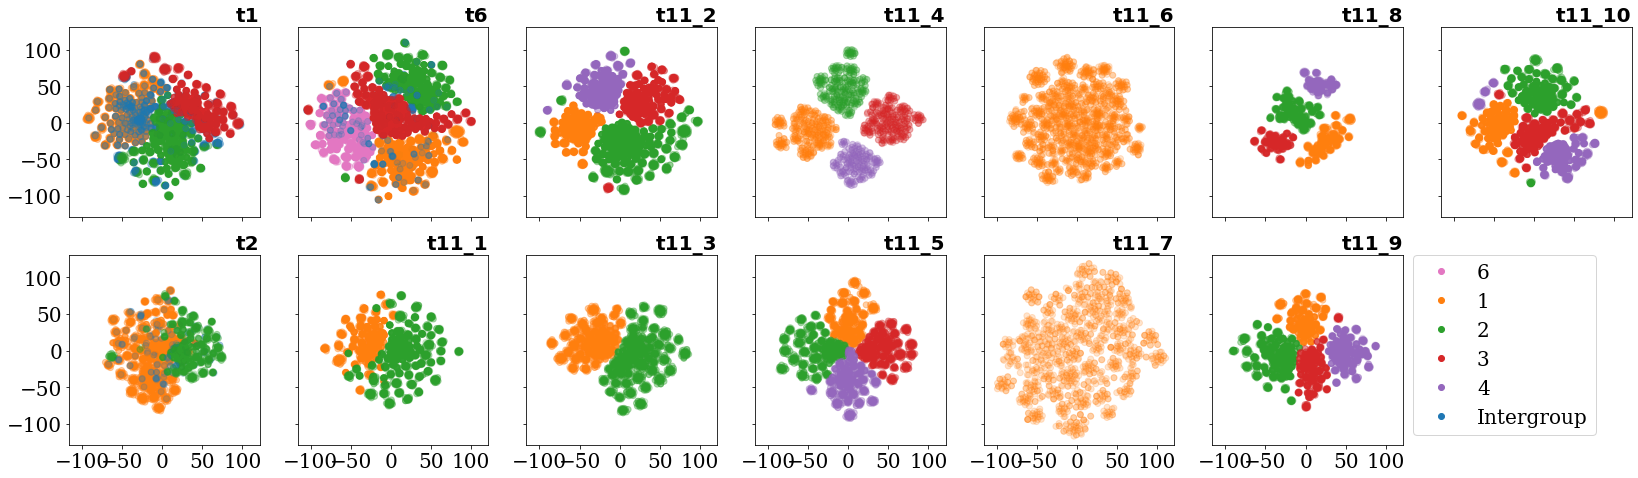

In [11]:
dict_color_leg = OrderedDict()
fig,ax = plt.subplots(nrows=2,ncols=7,figsize=(28,8),
                     sharex=True,sharey=True)
#fig.suptitle("TSNE for each high school organized by course",family=font.get_family(),size=font.get_size()*1.5)
for school in total_embeddings["Escuela"].unique():
    print(f"School : {school}")
    dataset = total_embeddings[total_embeddings["Escuela"] == school]
    dataset = dataset[dataset["class_classif"] != "Missing"]
    #Versión en 2D
    emb_2d = TSNE(n_components=2, learning_rate='auto',
              init='random',random_state = 0).fit_transform(dataset.iloc[:,:total_embeddings.shape[1]-3].values)

    dict_color = colors_classification(list(dataset["class_classif"].unique()),atributo)
    dict_color_leg.update(dict_color)
    colors = dataset["class_classif"].map(dict_color)
    ax[school%2,school//2].scatter(emb_2d[:,0],emb_2d[:,1],c=colors,cmap=cmap,alpha=0.2)
    ax[school%2,school//2].set_title(lista_nombres[school],fontweight="bold",loc ="right",fontsize=font.get_size())
    for tick in ax[school%2,school//2].get_xticklabels():
        tick.set_fontproperties(font)
    for tick in ax[school%2,school//2].get_yticklabels():
        tick.set_fontproperties(font)


    if school == (total_embeddings["Escuela"].max()-1):
        dict_color_leg.move_to_end("Intergroup",)
        dict_color_leg.move_to_end("6",last=False)
        custom = [Line2D([], [], marker='.', color=i, linestyle='None')
          for i in dict_color_leg.values()]
        ax[school%2,school//2].legend(handles = custom, labels=dict_color_leg,
                                     markerscale=2.,
                                     prop=font,
                                   #fontsize=font.get_size(), title_fontsize=font.get_size(),
                                    bbox_to_anchor= (1,0), loc= "lower left")
fig.delaxes(ax[-1,-1])
plt.subplots_adjust(top=.85)
fig.savefig("TSNE_2D_school_joined_womissing_"+str(atributo)+".jpg",bbox_inches="tight")




